## ==========  PERCEPTRON CLASSIFICATION ==============

In [1]:
data_set           = 0           # there are two data sets [0,1]
isLeastSquares     = 1           # if 0, then chooses the cross-entropy/log-likelyhood
activationFunction = 'sigmoid'   # no other option for now

# dataset dependent parameters
seed_learning_rate = 0.01    
max_iter           = 100000   
scaling_factor     = 1           # there is trade-off between scaling_factor and learning_rate 
                                 # higher scaling factor better distinguish between good and bad points 
                                 # however, gradient vanishes for large values, due to which it requires larger learning rate
minFn              = 1           # trypically all are minimization fns
'''
===== PLEASE BE VARY OF THE STARTING POINT ==========
'''

if data_set == 1:
    seed_learning_rate = 0.01
    scaling_factor     = 3           # since small distance; need to scale them higher for better distiction between good and bad
    minFn              = 0           # maximization fn
    if isLeastSquares == 0:
        seed_learning_rate = 0.0001
        scaling_factor     = 10
else:
    scaling_factor     = 0.1         # since large distances; need to scale them down for better distiction & better gradients
    seed_learning_rate = 0.01
    minFn              = 1
    if isLeastSquares == 0:
        seed_learning_rate = 0.002

    
if minFn == 1:
    print ("minimization function")
    direction          = 1           # move in negative direction
else:
    print ("maximization function")
    direction          = -1         # reverse direction or move in positive direction 


minimization function


### Reading Input Dataset: 2D Attribytes & Class Labels

In [2]:
import csv
import os

In [3]:
assert data_set == 1 or data_set == 0
assert isLeastSquares == 1 or isLeastSquares == 0
x1_attributes = []
x2_attributes = []
labels = []

if data_set == 1:
    __location__ = os.path.realpath(os.path.join(os.getcwd(), "dataset_binary/x_attributes.csv"))
else:
    __location__ = os.path.realpath(os.path.join(os.getcwd(), "dataset_binary/x_attributes.dat"))
print ("fetching data from location: " + __location__ + " . . .")
with open(__location__, 'r') as csvfile:   # Open the CSV file in read mode # Create a reader object
  csv_reader = csv.reader(csvfile)
  for row in csv_reader:  # Iterate through the rows in the CSV file
    if data_set != 1:
        row = row[0].split("  ")
    x1_attributes.append(float(row[0]))     # row is a list containing two element
    x2_attributes.append(float(row[1]))     # row is a list containing two element

if data_set == 1:
    __location__ = os.path.realpath(os.path.join(os.getcwd(), "dataset_binary/y_class_labels.csv"))
else:
    __location__ = os.path.realpath(os.path.join(os.getcwd(), "dataset_binary/y_class_labels.dat"))

print ("fetching data from location: " + __location__ + " . . .")
with open(__location__, 'r') as csvfile:   # Open the CSV file in read mode # Create a reader object
  csv_reader = csv.reader(csvfile)
  for row in csv_reader:  # Iterate through the rows in the CSV file
        
        if data_set == 1:
            labels.append(float(row[0]))     # row is a list containing single element
        else:
            if row[0] == 'Alaska':
                labels.append(1)
            else:
                labels.append(0)

print ("number of data points: " + str(len(x1_attributes)))
if len(x1_attributes) != len(labels) or len(x2_attributes) != len(labels):
    print ("ERROR! Input number of attributed does not match the number of class labels!")
    exit(0)

fetching data from location: /Users/dishantgoyal/Desktop/ml/0_neural_network_classification/dataset_binary/x_attributes.dat . . .
fetching data from location: /Users/dishantgoyal/Desktop/ml/0_neural_network_classification/dataset_binary/y_class_labels.dat . . .
number of data points: 100


### Plotting Dataset

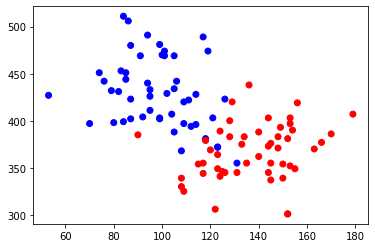

In [4]:
from matplotlib import pyplot as plt
color = []
for y in labels:
    if y == 0:
        color.append('red')
    else:
        color.append('blue')
plt.scatter(x1_attributes, x2_attributes, c=color)
plt.show()

### Plot Initial Hypthesis

##### starting point: line joining any two points, form: y = ax = b

passes through: (108.0, 368.0)  (131.0, 355.0)
initial slope: 0.05652173913043478, initial intercept: 313.89565217391305


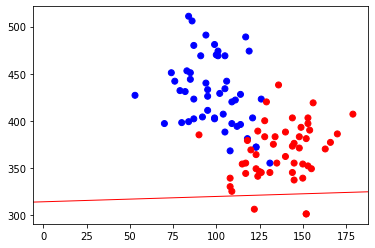

In [5]:
slope     =  -0.1*(x2_attributes[1] - x2_attributes[0])/(x1_attributes[1] - x1_attributes[0])
intercept =  x2_attributes[0] - x1_attributes[0]*slope
display_pt1 = "(" + str(x1_attributes[0]) + ", " + str(x2_attributes[0]) + ")"
display_pt2 = "(" + str(x1_attributes[1]) + ", " + str(x2_attributes[1]) + ")"
print("passes through: " + display_pt1 + "  " + display_pt2)
plt.scatter(x1_attributes, x2_attributes, c=color)
intercept = intercept + 2
if data_set == 0:
    intercept -= 50
print("initial slope: " + str(slope) + ", initial intercept: " + str(intercept))
plt.axline((3, 3*slope + intercept), slope=slope, linewidth=1, color='r')# or plt.plot([acidity[0],acidity[1]], [density[0],density[1]])
plt.show()


### Error Function: Least Squares or Log-Likelyhood

In [6]:
import math
e = math.e
def computeSigmoid (distance, gz):
    if    distance >= 10:                            # to avoid overflow errors
                            gz[0] = 1
    elif  distance <= -10:
                            gz[0] = 0
    else:
                            gz[0] = 1/(1+pow(e, -1*distance))     # lies between 0 and 1

In [7]:
def computeLeastSquares (class_label, gz, pt_error):
    if class_label == 0:  
        probability_class_0     = 1 - gz
        pt_error[0]             = (1-probability_class_0)*(1-probability_class_0)     # least sqaures cost function
    else:    
        probability_class_1     = gz
        pt_error[0]             = (1-probability_class_1)*(1-probability_class_1)
        
def computeCrossEntropy (class_label, gz, pt_error):
    limit = 0.00000000001
    if class_label == 0:  
        probability_class_0     = 1 - gz
        if probability_class_0 <= limit:
            pt_error[0]             = -1*math.log(limit)
        else:
            pt_error[0]             = -1*math.log(probability_class_0)                              # log likehood
    else:    
        probability_class_1     = gz
        if probability_class_1 <= limit:
            pt_error[0]             = -1*math.log(limit)
        else:
            pt_error[0]             = -1*math.log(probability_class_1)

In [8]:
def comp_error(a, b, error):
    for index in range(0, len(x1_attributes)):    # compute the full error
        x1              = x1_attributes[index]
        x2              = x2_attributes[index]
        distance        = (x2 - a*x1 - b)*scaling_factor                   # z = Theta_Transpose.x 
        gz              = [0]
        computeSigmoid (distance, gz)
        
        pt_error        = [0]                               
        if isLeastSquares:
            computeLeastSquares(labels[index], gz[0], pt_error)           # gz = probability of being in class 1
        else:
            computeCrossEntropy(labels[index], gz[0], pt_error)
        
        error[0] += pt_error[0]

error = [0]
comp_error(slope, intercept, error)
print ("initial error: " + str(error[0]))

initial error: 43.20100227871782


### Gradient Computation

In [9]:
def computeGradientLeastSquares (index, gz, grad_val):
    x1               = x1_attributes[index]
    if labels[index] == 0:                                          
        grad_val[0] += 2 * gz * gz * (1-gz) * -1 * x1 * scaling_factor           
        grad_val[1] += 2 * gz * gz * (1-gz) * -1 * 1  * scaling_factor
    else:                                                                         # gradient = 2(y - gz).-1.gz.(1-gz).(*)
        grad_val[0] += 2 * (1-gz) * -1 * gz * (1-gz) * -1 * x1 * scaling_factor
        grad_val[1] += 2 * (1-gz) * -1 * gz * (1-gz) * -1 * 1  * scaling_factor
        

def computeGradientLogLikelyhood (index, gz, grad_val):
    x1               = x1_attributes[index]
    if labels[index] == 0:                                               # gradient of -log(1-gz)   = -1/(1-gz)*-1
        grad_val[0] += -1 * 1 * -1 * gz * -1 * x1 * scaling_factor       # 1/(1-gz) * (1-gz) = 1    
        grad_val[1] += -1 * 1 * -1 * gz * -1 * 1  * scaling_factor
        
    else:                                                                # gradient of -log(gz)   = -1/gz
                                                                         # 1/gz * gz = 1
        grad_val[0] += -1 * 1 * (1-gz) * -1 * x1 * scaling_factor
        grad_val[1] += -1 * 1 * (1-gz) * -1 * 1  * scaling_factor

In [10]:
def comp_grad(a, b, grad_val):
    #grad_val        = [0,0]
    for index in range(0, len(x1_attributes)):
        x1              = x1_attributes[index]
        x2              = x2_attributes[index]
        distance        = (x2 - a*x1 - b)*scaling_factor          # z = Theta_Transpose.x
        gz              = [0]
        computeSigmoid (distance, gz)
        probability     = gz[0]                                   # probability of being in class 1
        
        if isLeastSquares:
            computeGradientLeastSquares   (index, gz[0] , grad_val)
        else:
            computeGradientLogLikelyhood  (index, gz[0] , grad_val)

num_iter = 0
grad_val = [0,0]
comp_grad(slope, intercept, grad_val)
print ("initial gradient: " + str(grad_val))

initial gradient: [-39.441222857258495, -0.305581164205805]


### Gradient Descent

In [11]:

flag = 0
num_iter = 0
best_slope     = slope
best_intercept = intercept
if minFn == 1:
    best_error = 9999999
else:
    best_error = 0
major_iter     = 0
learning_rate  = seed_learning_rate

while num_iter < max_iter:
    error = [0]
    comp_error(slope, intercept, error)
    if (num_iter%10000 == 0):
        print ("error:     " + str(error))
        major_iter += 1
        learning_rate = seed_learning_rate/math.sqrt(major_iter)        # adaptive learning rate
        
    grad_val  = [0,0]
    comp_grad (slope, intercept, grad_val)                              # computing gradient
    slope     = slope     - direction*learning_rate*grad_val[0];        # updating hypothesis
    intercept = intercept - direction*learning_rate*grad_val[1];        # updating hypothesis
    
    if error[0] > best_error   and minFn != 1:
        best_slope     = slope
        best_intercept = intercept
        best_error     = error[0]
    elif error[0] < best_error and minFn == 1:
        best_slope     = slope
        best_intercept = intercept
        best_error     = error[0]
        
    num_iter += 1
    if isLeastSquares == 0:       # check for error if reduced or not # we cannot say since not convex
        prev_error = error[0]
        error      = [0]
        comp_error(slope, intercept, error)
        if ((minFn == 1 and error[0] > prev_error) or (minFn == 0 and error[0] < prev_error)):
            direction = -1*direction
            slope     = slope     - direction*learning_rate*grad_val[0];        # updating hypothesis
            intercept = intercept - direction*learning_rate*grad_val[1];        # updating hypothesis
    
print ("best_error     : ", best_error)

error:     [43.20100227871782]
error:     [7.771268984100127]
error:     [7.746572212138221]
error:     [7.727118999428164]
error:     [7.710752100761098]
error:     [7.696468047313321]
error:     [7.683705869058619]
error:     [7.672115279481579]
error:     [7.661460637003745]
error:     [7.65157467031515]
best_error     :  7.642334627623801


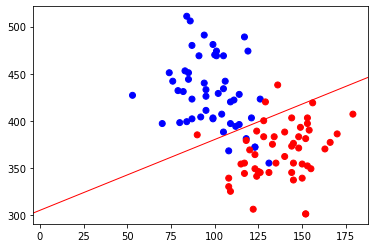

In [12]:
plt.scatter(x1_attributes, x2_attributes, c=color)
plt.axline((5, 5*best_slope + best_intercept), slope=best_slope, linewidth=1, color='r')# or plt.plot([acidity[0],acidity[1]], [density[0],density[1]])
plt.show()

### Why loglikelyhood could be problematic?

### Therefore, we change direction when required

In [13]:
if isLeastSquares == 0 and data_set == 1:
    scaling_factor = 1
    x1_attributes = [1,0]
    x2_attributes = [0,1]
    labels        = [1,0]
    color         = ['blue', 'red']


    slope = 1
    intercept = 20
    error = [0]
    comp_error(slope, intercept, error)
    print ("initial error: " + str(error[0]))
    plt.scatter(x1_attributes, x2_attributes, c=color)
    plt.axline((1, 1*slope + intercept), slope=slope, linewidth=1, color='r')# or plt.plot([acidity[0],acidity[1]], [density[0],density[1]])
    plt.show()


    slope = 1
    intercept = 9
    error = [0]
    comp_error(slope, intercept, error)
    print ("initial error: " + str(error[0]))
    plt.scatter(x1_attributes, x2_attributes, c=color)
    plt.axline((1, 1*slope + intercept), slope=slope, linewidth=1, color='r')# or plt.plot([acidity[0],acidity[1]], [density[0],density[1]])
    plt.show()

    slope = 1
    intercept = 3
    error = [0]
    comp_error(slope, intercept, error)
    print ("initial error: " + str(error[0]), " increses")
    plt.scatter(x1_attributes, x2_attributes, c=color)
    plt.axline((1, 1*slope + intercept), slope=slope, linewidth=1, color='r')# or plt.plot([acidity[0],acidity[1]], [density[0],density[1]])
    plt.show()

    slope = 1
    intercept = 2
    error = [0]
    comp_error(slope, intercept, error)
    print ("initial error: " + str(error[0]), " decreses")
    plt.scatter(x1_attributes, x2_attributes, c=color)
    plt.axline((1, 1*slope + intercept), slope=slope, linewidth=1, color='r')# or plt.plot([acidity[0],acidity[1]], [density[0],density[1]])
    plt.show()

    slope = 1
    intercept = 0
    error = [0]
    comp_error(slope, intercept, error)
    print ("initial error: " + str(error[0]), " decreses")
    plt.scatter(x1_attributes, x2_attributes, c=color)
    plt.axline((1, 1*slope + intercept), slope=slope, linewidth=1, color='r')# or plt.plot([acidity[0],acidity[1]], [density[0],density[1]])
    plt.show()


##### [GPT] The gradient provides guidance for small updates, not guarantees about large parameter changes.